# Machine Learning analysis on 5G attacks dataset

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np

In [22]:
dfattacks_BS1  = pd.read_csv("BTS_1.csv", sep=",", names = ["Flgs", "Seq", "Dur", "RunTime", "Mean", "Sum", "Min", "Max", "Proto", "sTos", "dTos", "sDSb", 
                                                            "dDSb", "sTtl", "dTtl", "sHops", "dHops","Cause","TotPkts","SrcPkts","DstPkts","TotBytes",
                                                            "SrcBytes","DstBytes", "Offset", "sMeanPktSz", "dMeanPktSz", "Load", "SrcLoad", "DstLoad",
         "Loss","SrcLoss", "DstLoss", "pLoss", "SrcGap", "DstGap", "Rate", "SrcRate", "DstRate", "State", "SrcWin", "DstWin", "sVid", "dVid", "SrcTCPBase", 
         "DstTCPBase", "TcpRtt", "SynAck", "AckDat", "Label", "Attack_Type", "Attack_Tool"], low_memory=False,  header=0)
dfattacks_BS2  = pd.read_csv("BTS_2.csv", sep=",", names = ["Flgs", "Seq", "Dur", "RunTime", "Mean", "Sum", "Min", "Max", "Proto", "sTos", "dTos", "sDSb", "dDSb",
                                                            "sTtl", "dTtl", "sHops", "dHops", "Cause","TotPkts","SrcPkts","DstPkts","TotBytes","SrcBytes","DstBytes",
                                                            "Offset", "sMeanPktSz", "dMeanPktSz", "Load", "SrcLoad", "DstLoad","Loss","SrcLoss", "DstLoss", "pLoss",
                                                            "SrcGap", "DstGap", "Rate", "SrcRate", "DstRate", "State", "SrcWin", "DstWin", "sVid", "dVid", "SrcTCPBase", 
         "DstTCPBase", "TcpRtt", "SynAck", "AckDat", "Label", "Attack_Type", "Attack_Tool"], low_memory=False, header=0)

#data.head()
#data.info() # also checking for missing values 

In [23]:
dfattacks_BS1 = dfattacks_BS1.drop(['dVid', 'SrcTCPBase','DstTCPBase', 'DstWin', 'SrcWin', 'sVid', 'SrcGap', 'DstGap', 'dHops', 'dTtl', 'dDSb', 'dTos'  ], axis=1)

In [24]:
dfattacks_BS2 = dfattacks_BS2.drop(['dVid', 'SrcTCPBase','DstTCPBase', 'DstWin', 'SrcWin', 'sVid', 'SrcGap', 'DstGap', 'dHops', 'dTtl', 'dDSb', 'dTos'  ], axis=1)

In [25]:
dfattacks_BS1 = dfattacks_BS1.drop(["Dur", "Mean", "Sum", "Min", "Max", "SrcPkts", 
                                    "DstPkts", "TotBytes", "SrcBytes", "SrcLoad" , "DstLoad", "SrcLoss",
                                    "Rate", "SrcRate", "DstRate", "AckDat", "Attack_Tool"], axis=1)
dfattacks_BS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728316 entries, 0 to 728315
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flgs         728316 non-null  object 
 1   Seq          728316 non-null  int64  
 2   RunTime      728316 non-null  float64
 3   Proto        728316 non-null  object 
 4   sTos         728116 non-null  float64
 5   sDSb         728116 non-null  object 
 6   sTtl         728116 non-null  float64
 7   sHops        728116 non-null  float64
 8   Cause        728316 non-null  object 
 9   TotPkts      728316 non-null  int64  
 10  DstBytes     728316 non-null  int64  
 11  Offset       728316 non-null  int64  
 12  sMeanPktSz   728316 non-null  float64
 13  dMeanPktSz   728316 non-null  float64
 14  Load         728316 non-null  float64
 15  Loss         728316 non-null  int64  
 16  DstLoss      728316 non-null  int64  
 17  pLoss        728316 non-null  float64
 18  State        728316 non-

In [26]:
dfattacks_BS2 = dfattacks_BS2.drop(["Dur", "Mean", "Sum", "Min", "Max", "SrcPkts", 
                                    "DstPkts", "TotBytes", "SrcBytes", "SrcLoad" , "DstLoad", "SrcLoss",
                                    "Rate", "SrcRate", "DstRate", "AckDat", "Attack_Tool"], axis=1)
dfattacks_BS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487574 entries, 0 to 487573
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flgs         487574 non-null  object 
 1   Seq          487574 non-null  int64  
 2   RunTime      487574 non-null  float64
 3   Proto        487574 non-null  object 
 4   sTos         487560 non-null  float64
 5   sDSb         487560 non-null  object 
 6   sTtl         487560 non-null  float64
 7   sHops        487560 non-null  float64
 8   Cause        487574 non-null  object 
 9   TotPkts      487574 non-null  int64  
 10  DstBytes     487574 non-null  int64  
 11  Offset       487574 non-null  int64  
 12  sMeanPktSz   487574 non-null  float64
 13  dMeanPktSz   487574 non-null  float64
 14  Load         487574 non-null  float64
 15  Loss         487574 non-null  int64  
 16  DstLoss      487574 non-null  int64  
 17  pLoss        487574 non-null  float64
 18  State        487574 non-

In [27]:
CombBS1_BS2 = pd.concat([dfattacks_BS1, dfattacks_BS2] )

CombBS1_BS2.dropna(inplace=True)
CombBS1_BS2.info()

CombBS1_BS2["Attack_Type"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215676 entries, 0 to 487573
Data columns (total 23 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Flgs         1215676 non-null  object 
 1   Seq          1215676 non-null  int64  
 2   RunTime      1215676 non-null  float64
 3   Proto        1215676 non-null  object 
 4   sTos         1215676 non-null  float64
 5   sDSb         1215676 non-null  object 
 6   sTtl         1215676 non-null  float64
 7   sHops        1215676 non-null  float64
 8   Cause        1215676 non-null  object 
 9   TotPkts      1215676 non-null  int64  
 10  DstBytes     1215676 non-null  int64  
 11  Offset       1215676 non-null  int64  
 12  sMeanPktSz   1215676 non-null  float64
 13  dMeanPktSz   1215676 non-null  float64
 14  Load         1215676 non-null  float64
 15  Loss         1215676 non-null  int64  
 16  DstLoss      1215676 non-null  int64  
 17  pLoss        1215676 non-null  float64
 18  Sta

Benign            477523
UDPFlood          457340
HTTPFlood         140812
SlowrateDoS        73124
TCPConnectScan     20052
SYNScan            20043
UDPScan            15906
SYNFlood            9721
ICMPFlood           1155
Name: Attack_Type, dtype: int64

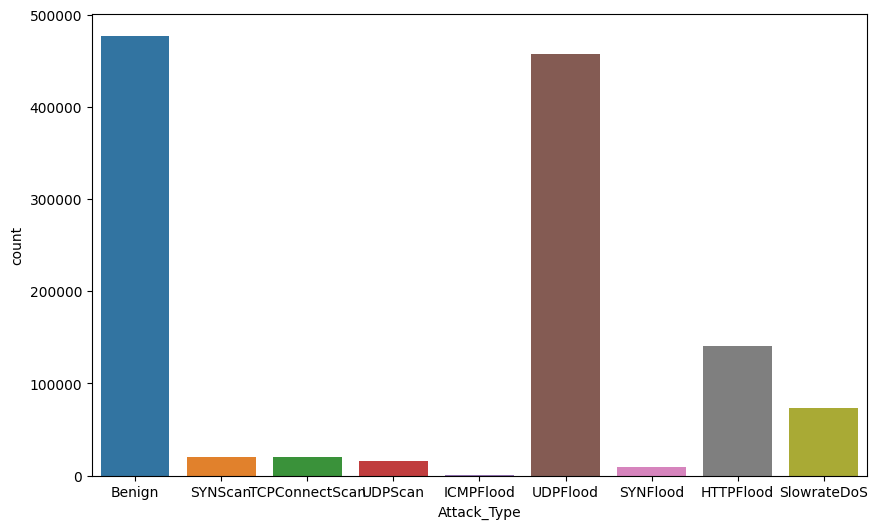

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=CombBS1_BS2, x="Attack_Type")
plt.show()

In [29]:
CombBS1_BS2= CombBS1_BS2.drop(["Label"], axis=1)
#CombBS1_BS2["Label"].value_counts()

In [30]:
CombBS1_BS2.head()

,Flgs,Seq,RunTime,Proto,sTos,sDSb,sTtl,sHops,Cause,TotPkts,...,sMeanPktSz,dMeanPktSz,Load,Loss,DstLoss,pLoss,State,TcpRtt,SynAck,Attack_Type
0,e,1,0.000000,icmp,0.0,cs0,58.0,6.0,Start,1,...,98.000000,0.000000,0.0000,0,0,0.0,ECO,0.0,0.0,Benign
1,e,2,0.000000,icmp,0.0,cs0,58.0,6.0,Start,1,...,98.000000,0.000000,0.0000,0,0,0.0,ECO,0.0,0.0,Benign
2,e,3,4.998020,udp,0.0,cs0,117.0,11.0,Start,214,...,1245.979614,271.166656,396280.1250,0,0,0.0,CON,0.0,0.0,Benign
3,e,4,4.998037,udp,0.0,cs0,117.0,11.0,Start,184,...,1326.656494,260.333344,352339.9375,0,0,0.0,CON,0.0,0.0,Benign
4,e,5,4.999453,udp,0.0,cs0,117.0,11.0,Start,223,...,1351.583374,236.473679,445855.1563,0,0,0.0,CON,0.0,0.0,Benign


In [31]:
 new_binary_attacks = CombBS1_BS2.loc[(CombBS1_BS2.Attack_Type=='Benign') | (CombBS1_BS2.Attack_Type=='UDPFlood'),:]

In [12]:
new_binary_attacks["Attack_Type"].value_counts()

Benign      477523
UDPFlood    457340
Name: Attack_Type, dtype: int64

In [32]:
 new_anomaly_attacks = CombBS1_BS2.loc[(CombBS1_BS2.Attack_Type=='Benign') | (CombBS1_BS2.Attack_Type=='SYNScan')
                                       | (CombBS1_BS2.Attack_Type=='TCPConnectScan') | (CombBS1_BS2.Attack_Type=='UDPScan')
                                       | (CombBS1_BS2.Attack_Type=='ICMPFlood') | (CombBS1_BS2.Attack_Type=='SYNFlood'),:]



In [33]:
new_anomaly_attacks["Attack_Type"].value_counts()

Benign            477523
TCPConnectScan     20052
SYNScan            20043
UDPScan            15906
SYNFlood            9721
ICMPFlood           1155
Name: Attack_Type, dtype: int64

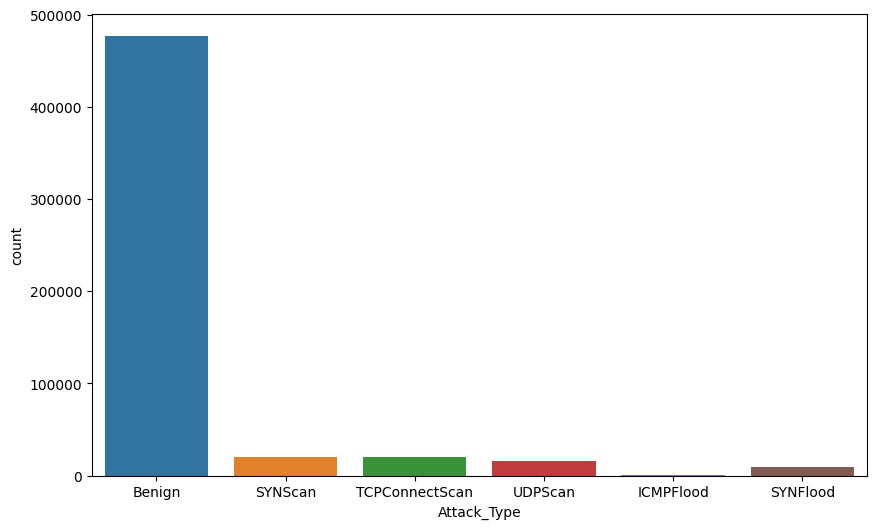

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_anomaly_attacks, x="Attack_Type")
plt.show()

In [35]:
target = new_anomaly_attacks["Attack_Type"]

mapping = {'Benign ': 0, 'SYNScan': 1, 'TCPConnectionScan': 2, 'UDPScan':3, 'ICMPFlood':4, 'SYNFlood':5}
target_numerical = np.vectorize(mapping.get)(target)

new_anomaly_attacks = new_anomaly_attacks.drop(columns = ["Flgs", "Proto","Cause","State", "sDSb"])
new_anomaly_attacks = new_anomaly_attacks.drop(columns = ["Attack_Type"])

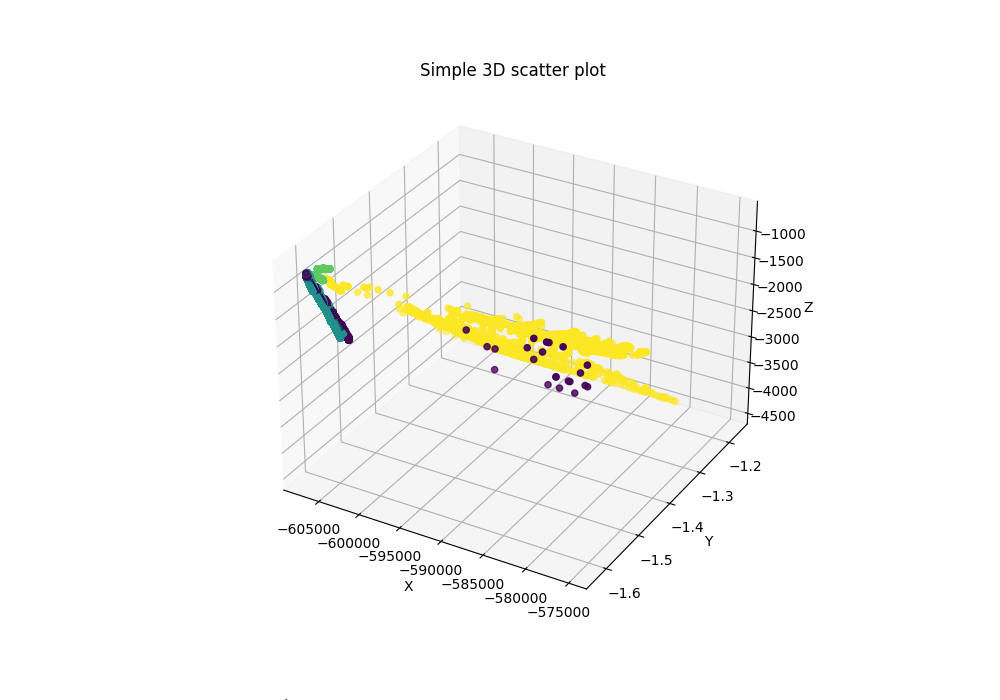

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.cm as cm
from sklearn.decomposition import PCA

# Enable inline plotting in Jupyter Lab
%matplotlib inline

# Enable widget-based plotting in Jupyter Lab
%matplotlib widget

# Enable notebook-based plotting in Jupyter Lab
%matplotlib notebook

pca = PCA(n_components=3)
x = pca.fit_transform(new_anomaly_attacks)[:,0]
y = pca.fit_transform(new_anomaly_attacks)[:,1]
z = pca.fit_transform(new_anomaly_attacks)[:,2]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = target_numerical.astype(float)

# Plotting the scatter plot with colors based on cluster_colors
ax.scatter3D(x, y, z,c=colors , cmap='viridis')

# Setting labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('PCA plot')

# Function to update the rotation angle
def update_rotation(angle):
    ax.view_init(elev=30, azim=angle)

# Animation update function
def update(frame):
    angle = frame * rotation_speed  # Adjust the rotation speed based on the frame number
    update_rotation(angle)

# Creating the animation
animation = FuncAnimation(fig, update, frames=np.arange(0, 181, 2), interval=50)  # Adjust the number of frames and interval as needed

# Displaying the plot
plt.show()